Now that we have seen how we can use vectors to calculate the trajectory of a ball acting under the influence of gravity, we can move on to something more exotic.  In this exercise, we will incorporate wind resistance (or drag force) acting on the ball into our simulation and the magnus effect, which controls how the spin of the ball effects the path.  

First we begin with the drag force acting on the ball.  Drag is type of friction force that acts on a moving body in the direction opposite the direction of motion of the body when the body is in a fluid.  The underlining causes of drag are a little complicated to discuss in this context, but the equation is relatively easy to write down.  In one dimension the magnitude of the drag force is given by 

$F_D = 0.5\rho v^2C_DA$

where $\rho$ is the density of the surrounding fluid--in this case air, $v$ is the speed,$C_D$ is the dimensionless drag coefficient, and $A$ is the cross section area.  The density of air is usually around $1.225\times 10^{-6}\space kg/cm^3$.  The cross section area of the ball is just $\pi r^2$, where the radius of a typical soccer ball is around $11\space cm$. According to NASA, the coefficient of drag for a typical soccer ball is $0.25$, which is good enough for me (they put men on the moon!).  Can you write the vector equivalent of the drag force in terms of the ball's velocity at a given point of time? 

We shall use the velocity vector ${\bf{v}}(t)$ to indicate the velocity at a given point in time.  The free-body diagram is given below for an arbitrary velocity of the center of the ball (blue arrow)


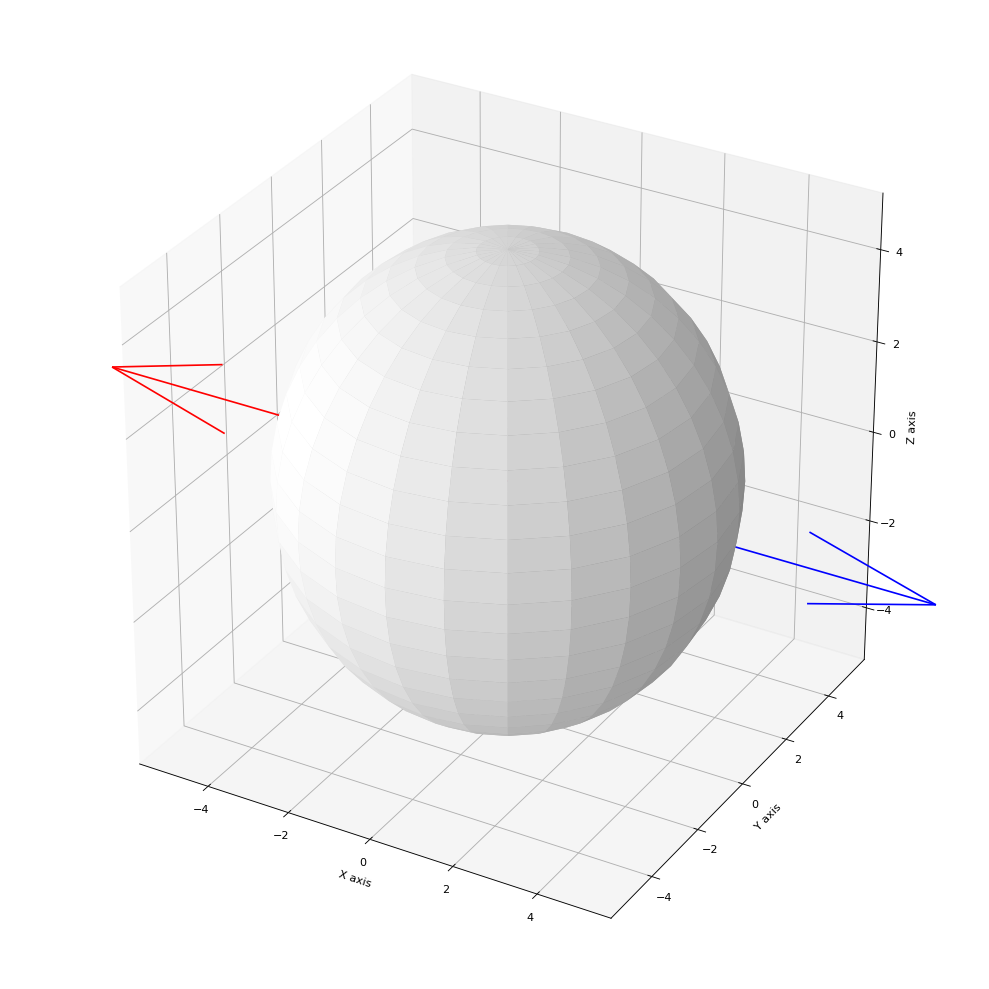

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np 

#initialize the figure 
fig = plt.figure(figsize=(16, 16), dpi= 80, facecolor='w', edgecolor='k')

ax = fig.add_subplot(111, aspect= 'equal',projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 25)
v = np.linspace(0, np.pi, 25)
x = 5 * np.outer(np.cos(u), np.sin(v))
y = 5 * np.outer(np.sin(u), np.sin(v))
z = 5 * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface

ax.quiver([0],[0],[0],[10],[0],[0],color='b' )
ax.quiver([0],[0],[0],[-10],[0],[0],color='r' )
#ax.quiverkey(Q, 0.9, 0.9, 2, r'$f_{gravity}$', labelpos='E',coordinates='figure')
ax.plot_surface(x, y, z, color='w')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

In [1]:
from matplotlib import animation, rc
import matplotlib.pyplot as plt
import numpy as np 
from IPython.display import HTML, Image
from mpl_toolkits.mplot3d import Axes3D

#initialize the figure 
fig = plt.figure(figsize=(16, 16), dpi= 80, facecolor='w', edgecolor='k')

ax = fig.add_subplot(111, aspect= 'equal',projection='3d')

# Make data
def data(t):
    u = np.linspace(t, 2 * np.pi+t, 25)
    v = np.linspace(0, np.pi, 25)
    x = 5 * np.outer(np.cos(u), np.sin(v))
    y = 5 * np.outer(np.sin(u), np.sin(v))
    z = 5 * np.outer(np.ones(np.size(u)), np.cos(v))
    return x, y, z
# Plot the surface

def init():
    x,y,z = data(0)
    S = ax.plot_surface(x, y, z, color= 'w') 
    ax.quiver([0],[0],[0],[0],[0],[10],color='g' )
    ax.quiver([0],[0],[0],[-10],[0],[0],color='b' )
    ax.quiver([0],[0],[0],[0],[-10],[0],color='r' )
    ax.text(0, 0, 5, "Angular Velocity", color='green', fontsize=25)
    ax.text(-5, 0, 0, "Velocity", color='blue', fontsize=25)
    return S,

def animate(i):
    ax.clear()
    ax.quiver([0],[0],[0],[0],[0],[10],color='g' )
    ax.quiver([0],[0],[0],[-10],[0],[0],color='b' )
    ax.quiver([0],[0],[0],[0],[-10],[0],color='r' )
    x, y,z = data(i* 2*np.pi/100.00)
    S = ax.plot_surface(x, y, z, color='w')
    ax.text(0, 0, 5, "Angular Velocity", color='green', fontsize=25)
    ax.text(-5, 0, 0, "Velocity", color='blue', fontsize=25)
    return S, 
    
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=True)
rc('animation', html='html5')
anim

In [2]:
import numpy as np



#initial positions array for vertex of the truncated icosahedron (soccer ball)
a = (1+np.sqrt(5))/2
pos = np.array([[0,1, 3*a],[0,-1,-3*a],[0,1, -3*a],[0,-1,3*a],
[3*a,0,1],[-3*a,0,-1],[3*a,0,-1],[-3*a,0,1],
[1, 3*a,0],[-1,-3*a,0],[1, -3*a,0],[-1,3*a,0],
[1,(2+a), 2*a],[-1,-(2+a), -2*a],[1,-(2+a), -2*a],[-1,(2+a), 2*a],[-1,-(2+a), 2*a],[1,(2+a), -2*a],[1,-(2+a), 2*a],[-1,(2+a), -2*a],
[2*a, 1, (2+a)],[-2*a, -1,-(2+a)],[2*a, -1, -(2+a)],[-2*a, 1,(2+a)], [-2*a, -1, (2+a)],[2*a, 1,-(2+a)],[2*a, -1, (2+a)],[-2*a, 1,-(2+a)],           
[(2+a),2*a,1],[-(2+a),-2*a,-1],[(2+a),-2*a,-1],[-(2+a),2*a,1],[-(2+a),-2*a,1],[(2+a),2*a,-1],[(2+a),-2*a,1],[-(2+a),2*a,-1],
[2,(1+2*a), a], [-2,-(1+2*a), -a], [2,(1+2*a), -a],[-2,-(1+2*a), a],  [2,-(1+2*a), a],[-2,(1+2*a), -a],[2,-(1+2*a), -a],[-2,(1+2*a), a],
[(1+2*a),a, 2], [-(1+2*a),-a, -2], [(1+2*a),-a, -2], [-(1+2*a),a, 2],[(1+2*a),a, -2], [-(1+2*a),-a, 2],[-(1+2*a),a, -2], [(1+2*a),-a, 2],
[a,2, (1+2*a)], [-a,-2, -(1+2*a)], [a,2, -(1+2*a)], [-a,-2, (1+2*a)], [a,-2, -(1+2*a)], [-a,2, (1+2*a)], [a,-2, (1+2*a)], [-a,2, -(1+2*a)]])

#radius of ball in cm
radiusBall = 11

#scale position vectors of the ball's vertices to approximate correct radius
pos = radiusBall/5.0* pos 
# time over which to run the simulation
timeInterval = 1.5
# time integration parameter
dt = 0.0001
# total number of steps to run
numSteps = int(np.ceil(timeInterval/dt))
#revolutions per minute
rpm = 3000
#direction of angular velocity vector; no need to be a unit vector
angVelDirection = np.array([0,0,1])
#mass in kg for ball
mass = 0.43
# angular Velocity of ball in radians per second
angularVelocity = rpm/60.0*2*np.pi*angVelDirection/np.linalg.norm(angVelDirection)
# initial position of ball cm
initPos = np.array([0.0,0.0,0.0])
# initial velocity of ball cm/s
initVelocity = np.array([0.0,2900, 0.00])
# air density kg/cm*3
airDens = 1.225e-6
# Toggle gravity on (True) or off (False)
gravityOn = False
# Toggle wind resistance on (True) or off (False)
windResistanceOn = True
# Toggle magnus effect on (True) or off (False)
magnusEffectOn = True
#acceleration due to gravity in cm/s^2
gravity = np.array([0.0,0.0,-981.00])
# unitless drag coefficient for soccerball (NASA has is as 0.25)
dragCoeff = 0.25
# cross section area of ball, area of circle formed by cutting ball in half cm^2
crossSectArea = np.pi*radiusBall**2

def calculateAcceleration(velocity):
    acceleration = np.array([0.0,0.0,0.0])
    if gravityOn == True:
        acceleration += gravity
    if windResistanceOn ==True:
        #D = .5 * rho * V^2 * A * cd
        acceleration += -0.5* airDens*np.linalg.norm(velocity)* crossSectArea*dragCoeff/mass*velocity
    if magnusEffectOn==True:
        acceleration +=np.pi**2*radiusBall**3*airDens/mass*np.cross(angularVelocity,velocity)
    return acceleration
def integratePosition(position, velocity, acceleration):
        position = position+ velocity * dt + 0.5* acceleration*dt**2
        return position
def integrateVelocity(velocity, acceleration):
    newVelocity = velocity + 0.5* acceleration*dt
    acceleration = calculateAcceleration(velocity)
    newVelocity = newVelocity + 0.5* acceleration*dt
    return newVelocity, acceleration

def calculateRotationMatrixVectors(angVel):
    transMat = np.zeros((3,3))
    #we calculate each column of the rotation matrix 
    x = np.array([1.0,0.0,0.0])
    y = np.array([0.0,1.0,0.0])
    z = np.array([0.0,0.0,1.0])
    
    VecList = []
    #first column (spin is counter clockwise)
    projVec = np.dot(x,angVel)/np.linalg.norm(angVel)**2*angVel
    projVecLength = np.linalg.norm(projVec)
    firstVec = x -projVec
    firstVecLength = np.linalg.norm(firstVec)
    if firstVecLength < 1e-6:
        scaledSecVec = np.zeros(3)
    else:
        secondVec = np.cross(angVel,firstVec)
        scaledSecVec = firstVecLength* secondVec/np.linalg.norm(secondVec)
    VecList.append( [projVec, firstVec, scaledSecVec])
    
    #second column (spin is counter clockwise)
    projVec = np.dot(y,angVel)/np.linalg.norm(angVel)**2*angVel
    projVecLength = np.linalg.norm(projVec)
    firstVec = y -projVec
    firstVecLength = np.linalg.norm(firstVec)
    if firstVecLength < 1e-6:
        scaledSecVec = np.zeros(3)
    else:
        secondVec = np.cross(angVel,firstVec)
        scaledSecVec = firstVecLength* secondVec/np.linalg.norm(secondVec)
    VecList.append( [projVec, firstVec, scaledSecVec])
    
    #third Column (spin is counter clockwise)
    projVec = np.dot(z,angVel)/np.linalg.norm(angVel)**2*angVel
    projVecLength = np.linalg.norm(projVec)
    firstVec = z -projVec
    firstVecLength = np.linalg.norm(firstVec)
    if firstVecLength < 1e-6:
        scaledSecVec = np.zeros(3)
    else:
        secondVec = np.cross(angVel,firstVec)
        scaledSecVec = firstVecLength* secondVec/np.linalg.norm(secondVec)
    VecList.append( [projVec, firstVec, scaledSecVec])
    return VecList

def calculateBallPositions(time,vecList, angVel, pos):
    w = np.linalg.norm(angVel)
    transMat = np.zeros((3,3))
    for i, vList in enumerate(vecList):
        transMat[:,i]= vList[0]+vList[1]*np.cos(w*time)+ vList[2]*np.sin(w*time)
    
    newPos = np.zeros(np.shape(pos))
    for i in range(np.shape(pos)[0]):
        newPos[i,:] = np.dot(transMat, pos[i,:])
        
    return newPos

#### now we actually run the simulation ####

vectorList = calculateRotationMatrixVectors(angularVelocity)
acceleration = calculateAcceleration(initVelocity)
position = initPos
velocity= initVelocity

print np.linalg.norm(velocity)
handle = open('full.xyz', 'w')
for i in range(numSteps):
    position = integratePosition(position, velocity, acceleration)
    velocity, acceleration= integrateVelocity(velocity, acceleration)
    time = i * dt
    newPos = calculateBallPositions(time, vectorList, angularVelocity, pos)
    newPos = newPos+position
    s = ''
    s += str(60)+ '\n\n'
    for j in range(np.shape(pos)[0]):
        s += '%-3s %10.5f %10.5f %10.5f\n' % ('c', newPos[j,0],newPos[j,1],newPos[j,2])
    handle.write(s)
handle.close()
print np.linalg.norm(velocity)
    
    

2900.0
1856.2424493
